https://numbersandshapes.net/post/fitting_sir_to_data_in_python/

git commit 
git add .
git commit 
modifier
git push

In [2]:
import os
import numpy as np
import yaml
import datetime

import pandas as pd

import dash 
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

#Répertoire de sauvegarde des fichiers bruts
PROCESSED_DIR = '../data/processed/'

#Table principale
ALL_DATA_FILE = 'all_data.csv'

ENV_FILE='../env.yaml'
with open(ENV_FILE) as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

#Initialisation des chemins vers les fichiers
ROOT_DIR = os.path.dirname(os.path.abspath(ENV_FILE))
DATA_FILE= os.path.join(ROOT_DIR, params['directories']['processed'], params['files']['all_data'])

#Lecture du fihcier de données
epidemie_df = (pd.read_csv(DATA_FILE, parse_dates=['Last Update'])
               .assign(day=lambda _df:_df['Last Update'].dt.date)
               .drop_duplicates(subset=['Country/Region', 'Province/State', 'day'])
               [lambda df: df['day'] <= datetime.date(2020,3,10)]
              )


countries=[{'label':c, 'value': c} for c in epidemie_df['Country/Region'].unique()]
app = dash.Dash('Corona Virus Explorer')
app.layout = html.Div([
    html.H1(['Corona Virus Explorer'], style={'textAlign': 'center'}),
    dcc.Tabs([
        dcc.Tab(label='Time', children=[
            html.Div([
                dcc.Dropdown(
                    id='country',
                    options=countries
                )
            ]),
            html.Div([
                dcc.Dropdown(
                    id='country2',
                    options=countries
                )

            ]),
            html.Div([
                dcc.RadioItems(
                    id='variable',
                    options=[
                        {'label':'Confirmed', 'value': 'Confirmed'},
                        {'label':'Deaths', 'value': 'Deaths'},
                        {'label':'Recovered', 'value': 'Recovered'}
                    ],
                    value='Confirmed',
                    labelStyle={'display': 'inline-block'}
                )
            ]),
            html.Div([
                dcc.Graph(id='graph1')
            ])
        ]),
        dcc.Tab(label='Map', children=[
            html.H6(['The map:']),
            dcc.Graph(id='map1'),
            dcc.Slider(
                id='map_day',
                min=0,
                max=(epidemie_df['day'].max() - epidemie_df['day'].min()).days,
                value=0,
                marks={i:str(i) for i, date in enumerate(epidemie_df['day'].unique())}
            )     
        ]),
        dcc.Tab(label='Modelisation', children=[
            html.Div([
                dcc.Dropdown(
                    id='country',
                    options=countries
                )
            ]),
            html.Div([
                dcc.Input(
                    id= 'alpha',placeholder='Enter a value for alpha', type='number'),
                dcc.Input(
                    id='beta',placeholder='Enter a velu for beta', type='number') ,
                html.Hr(),
                html.Div(id="number-out"),
                
            ]),
               
    ]),
])

@app.callback(
    Output('graph1', 'figure'),
    [
        Input('country','value'),
        Input('country2','value'),
        Input('variable','value'),
    ]
)
def update_graph(country, country2, variable):
    print(country)
    
    if country is None:
        graph_df = epidemie_df.groupby('day').agg({variable:'sum'}).reset_index()
    else:
            graph_df=(epidemie_df[epidemie_df['Country/Region'] == country]
              .groupby(['Country/Region', 'day'])
              .agg({variable:'sum'})
              .reset_index()
             )
    if country2 is not None:
        graph2_df=(epidemie_df[epidemie_df['Country/Region'] == country2]
              .groupby(['Country/Region', 'day'])
              .agg({variable:'sum'})
              .reset_index()
             )              
    return {
        'data':[
            dict(
                x=graph_df['day'],
                y=graph_df[variable],
                type='line',
                name=country if country is not None else 'Total'
            )
        ] + ([
            dict(
                x=graph2_df['day'],
                y=graph2_df[variable],
                type='line',
                name=country2
            )
        ] if country2 is not None else [])
    }

@app.callback(
    Output('map1', 'figure'),
    [
        Input('map_day','value'),
    ]
)
def update_map(map_day):
    day= epidemie_df['day'].unique()[map_day]
    map_df = (epidemie_df[epidemie_df['day'] == day]
              .groupby(['Country/Region'])
              .agg({'Confirmed':'sum', 'Latitude': 'mean', 'Longitude': 'mean'})
              .reset_index()
             )

    return {
        'data':[
            dict(
                type='scattergeo',
                lon=map_df['Longitude'],
                lat=map_df['Latitude'],
                text=map_df.apply(lambda r: r['Country/Region'] + '(' + str(r['Confirmed']) + ')', axis=1),
                mode='markers',
                marker=dict(
                    size=np.maximum(map_df['Confirmed']/ 1_000, 10)
                )
            )
        ],
        'layout': dict(
            title=str(day),
            geo=dict(showland=True)
        )
       
    }
@app.callback(
    Output('number-out', 'children'),
    [
        Input('alpha', 'value'),
        Input('beta','value'),
    ]
)
def number_render(fval, tval):
return "alpha: {}, beta: {}".format(fval, tval)
              
if __name__ == '__main__':
    app.run_server(debug=True)

SyntaxError: invalid syntax (<ipython-input-2-23c0db839179>, line 108)

In [4]:
!pip install yaml

  ERROR: Could not find a version that satisfies the requirement yaml (from versions: none)
ERROR: No matching distribution found for yaml


In [3]:
import yaml

In [4]:
import datetime


import os

import numpy as np
import pandas as pd

In [5]:
ENV_FILE='../env.yaml'
with open(ENV_FILE) as f:
    params = yaml.load(f, Loader=yaml.FullLoader)

#Initialisation des chemins vers les fichiers
ROOT_DIR = os.path.dirname(os.path.abspath(ENV_FILE))
DATA_FILE= os.path.join(ROOT_DIR, params['directories']['processed'], params['files']['all_data'])

#Lecture du fihcier de données
epidemie_df = (pd.read_csv(DATA_FILE, parse_dates=['Last Update'])
               .assign(day=lambda _df:_df['Last Update'].dt.date)
               .drop_duplicates(subset=['Country/Region', 'Province/State', 'day'])
               [lambda df: df['day'] <= datetime.date(2020,3,12)]
              )

In [6]:
epidemie_df.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,source,day
0,Hubei,Mainland China,2020-02-26 14:13:10,65187.0,2615.0,20969.0,30.9756,112.2707,02-26-2020.csv,2020-02-26
1,Guangdong,Mainland China,2020-02-26 10:33:02,1347.0,7.0,851.0,23.3417,113.4244,02-26-2020.csv,2020-02-26
2,Henan,Mainland China,2020-02-26 10:33:02,1271.0,19.0,1033.0,33.8820,113.6140,02-26-2020.csv,2020-02-26
3,NaN,South Korea,2020-02-26 11:03:11,1261.0,12.0,22.0,36.0000,128.0000,02-26-2020.csv,2020-02-26
4,Zhejiang,Mainland China,2020-02-26 10:33:02,1205.0,1.0,867.0,29.1832,120.0934,02-26-2020.csv,2020-02-26


In [7]:
france_df=(epidemie_df[epidemie_df['Country/Region']=='France']
           .groupby(['Country/Region', 'day'])
           .agg({'Confirmed': 'sum', 'Deaths':'sum','Recovered':'sum'})
           .reset_index()
          )
france_df.tail()


,Country/Region,day,Confirmed,Deaths,Recovered
23,France,2020-03-07,949.0,11.0,12.0
24,France,2020-03-08,1126.0,19.0,12.0
25,France,2020-03-09,1209.0,19.0,12.0
26,France,2020-03-10,1784.0,33.0,12.0
27,France,2020-03-11,2287.0,48.0,12.0


In [12]:
nb_df=(epidemie_df.groupby(['Country/Region', 'day'])
           .agg({'Confirmed': 'sum', 'Deaths':'sum','Recovered':'sum'})
           .reset_index()
          )
nb_df.tail()

,Country/Region,day,Confirmed,Deaths,Recovered
1320,Vietnam,2020-03-08,30.0,0.0,16.0
1321,Vietnam,2020-03-11,38.0,0.0,16.0
1322,Vietnam,2020-03-12,39.0,0.0,16.0
1323,occupied Palestinian territory,2020-03-10,25.0,0.0,0.0
1324,occupied Palestinian territory,2020-03-11,0.0,0.0,0.0


In [13]:
nb_df.head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1.0,0.0,0.0
1,Afghanistan,2020-02-24,1.0,0.0,0.0
2,Afghanistan,2020-03-08,4.0,0.0,0.0
3,Afghanistan,2020-03-10,5.0,0.0,0.0
4,Afghanistan,2020-03-11,7.0,0.0,0.0


In [8]:
france_df['Confirmed'].diff()

0       NaN
1       1.0
2       0.0
3       0.0
4       1.0
5       1.0
6       0.0
7       0.0
8       1.0
9       5.0
10      0.0
11      1.0
12      2.0
13      4.0
14     20.0
15     19.0
16     43.0
17     30.0
18     61.0
19     13.0
20     81.0
21     92.0
22    276.0
23    296.0
24    177.0
25     83.0
26    575.0
27    503.0
Name: Confirmed, dtype: float64

In [9]:
def get_country(self, country):
    return (epidemie_df[epidemie_df['Country/Region']==country]
           .groupby(['Country/Region', 'day'])
           .agg({'Confirmed': 'sum', 'Deaths':'sum','Recovered':'sum'})
           .reset_index()
           )
#Monkey Patch pd.Dataframe
pd.DataFrame.get_country = get_country           

In [41]:
kk=get_country(epidemie_df, 'South Korea').head()

In [42]:
kk

,Country/Region,day,Confirmed,Deaths,Recovered
0,South Korea,2020-01-22,1.0,0.0,0.0
1,South Korea,2020-01-23,1.0,0.0,0.0
2,South Korea,2020-01-24,2.0,0.0,0.0
3,South Korea,2020-01-25,2.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0


In [24]:
korea_df=epidemie_df.get_country('South Korea')

In [40]:
korea_df

,Country/Region,day,Confirmed,Deaths,Recovered,infected
0,South Korea,2020-01-22,1.0,0.0,0.0,NaN
1,South Korea,2020-01-23,1.0,0.0,0.0,0.0
2,South Korea,2020-01-24,2.0,0.0,0.0,1.0
3,South Korea,2020-01-25,2.0,0.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0,1.0
5,South Korea,2020-01-27,4.0,0.0,0.0,1.0
6,South Korea,2020-01-28,4.0,0.0,0.0,0.0
7,South Korea,2020-01-29,4.0,0.0,0.0,0.0
8,South Korea,2020-01-30,4.0,0.0,0.0,0.0
9,South Korea,2020-01-31,11.0,0.0,0.0,7.0


In [16]:
italy_df=epidemie_df.get_country('Italy')
italy_df.head()

,Country/Region,day,Confirmed,Deaths,Recovered
0,Italy,2020-01-31,2.0,0.0,0.0
1,Italy,2020-02-07,3.0,0.0,0.0
2,Italy,2020-02-21,20.0,1.0,0.0
3,Italy,2020-02-22,62.0,2.0,1.0
4,Italy,2020-02-23,155.0,3.0,2.0


In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
korea_df['infected'] = korea_df['Confirmed'].diff()
italy_df['infected'] = italy_df['Confirmed'].diff()

NameError: name 'italy_df' is not defined

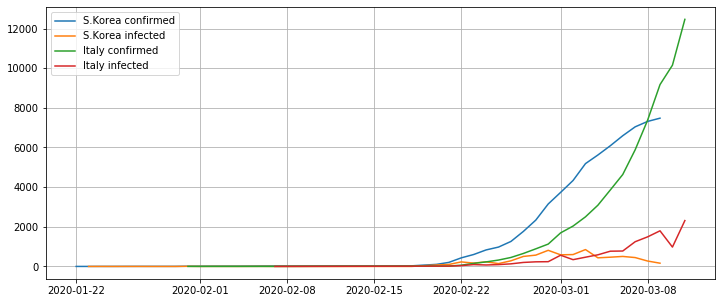

In [19]:
fig = plt.figure(figsize=(12,5))
plt.plot(korea_df.day, korea_df['Confirmed'], label='S.Korea confirmed')
plt.plot(korea_df.day, korea_df['infected'], label='S.Korea infected' )
plt.plot(italy_df.day, italy_df['Confirmed'], label='Italy confirmed')
plt.plot(italy_df.day, italy_df['infected'], label='Italy infected')
plt.grid(True)
plt.legend()
plt.show()

In [21]:
beta,gamma = [0.01,0.1]

def SIR(t,y):
    S = y[0]
    I = y[1]
    R = y[2]
    return([-beta*S*I, beta*S*I-gamma*I, gamma*I])

In [22]:
y[0]

NameError: name 'y' is not defined

In [36]:
SIR(1,40)

TypeError: 'int' object is not subscriptable

In [29]:
korea_df.loc[2:].head()

,Country/Region,day,Confirmed,Deaths,Recovered,infected
2,South Korea,2020-01-24,2.0,0.0,0.0,1.0
3,South Korea,2020-01-25,2.0,0.0,0.0,0.0
4,South Korea,2020-01-26,3.0,0.0,0.0,1.0
5,South Korea,2020-01-27,4.0,0.0,0.0,1.0
6,South Korea,2020-01-28,4.0,0.0,0.0,0.0


In [19]:
from scipy.integrate import solve_ivp
beta,gamma = [0.01,0.1]
solution_korea = solve_ivp(SIR,[0,40],[51_470_000,1,0],t_eval=np.arange(0,40,1))

In [30]:
def plot_epidemia(solution, infected):
    fig = plt.figure(figsize=(12,5))
    plt.plot(solution.t,solution.y[0])
    plt.plot(solution.t,solution.y[1])
    plt.plot(solution.t,solution.y[2])
    plt.plot(infected.reset_index(drop=True).index,infected,"k*:")
    plt.grid("True")
    plt.legend(["Susceptible","Infected","Removed","Original Data"])
    plt.show()

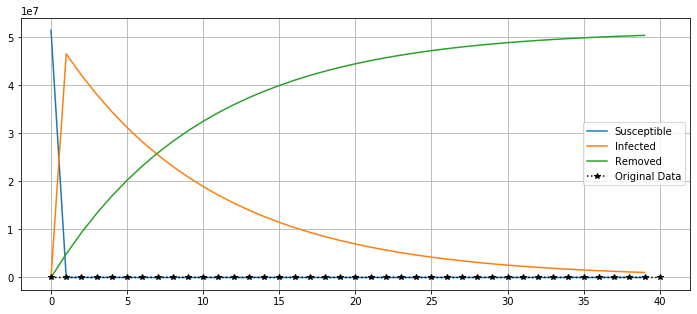

In [34]:
plot_epidemia(solution_korea, korea_df.loc[2:]['infected'])

In [25]:
korea_df['infected'].max()

851.0

In [26]:
korea_df['Recovered'].diff().max()

94.0

In [27]:
(korea_df['Recovered'].diff().loc[korea_df['infected'] !=0]/korea_df['infected'].loc[korea_df['infected'] !=0]).mean()

0.17870945831971552

In [28]:
beta,gamma = [0.00000001,0.15]
solution_korea = solve_ivp(SIR,[0,40],[51_470_000,1,0],t_eval=np.arange(0,40,1))

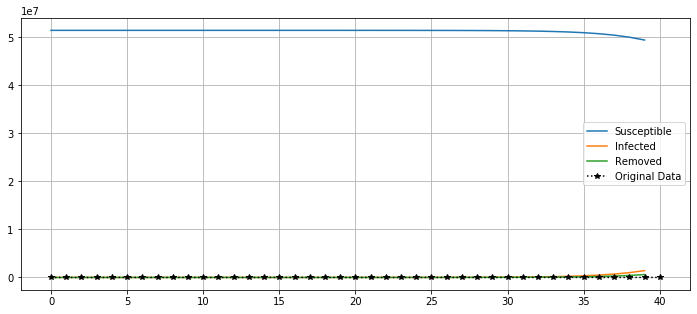

In [29]:
plot_epidemia(solution_korea, korea_df.loc[2:]['infected'])

In [30]:
def sumsq_error(parameters):
    beta, gamma = parameters
    def SIR(t,y):
        S=y[0]
        I=y[1]
        R=y[2]
        return([-beta*S*I, beta*S*I-gamma*I, gamma*I])
    
    solution = solve_ivp(SIR,[0,nb_steps-1],[total_population,1,0],t_eval=np.arange(0,nb_steps,1))
        
    return(sum((solution.y[1]-infected_population)**2))


In [31]:
total_population = 51_470_000
infected_population = korea_df.loc[2:]['infected']
nb_steps = len(infected_population)

In [92]:
%%time
from scipy.optimize import minimize

msol = minimize(sumsq_error,[0.001,0.1],method='Nelder-Mead')
msol.x

KeyboardInterrupt: 

In [15]:
beta_optimal = 5.67e-3
gamma_optimal = 24.7

In [16]:
beta = beta_optimal
gamma = gamma_optimal 
solution_korea_optimal = solve_ivp(SIR, [0,40], [51_470_000, 1 ,0], t_eval=np.arange(0,40,1))

NameError: name 'solve_ivp' is not defined

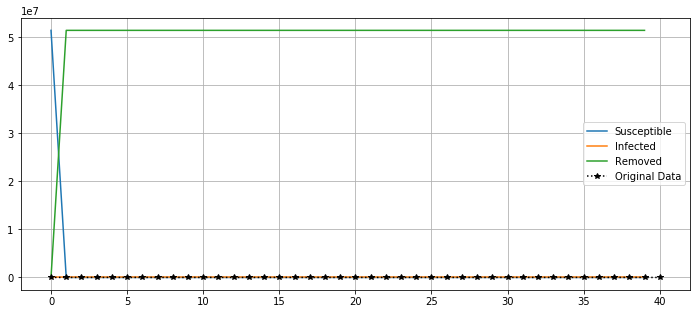

In [34]:
plot_epidemia(solution_korea_optimal, korea_df.loc[2:]['infected'])

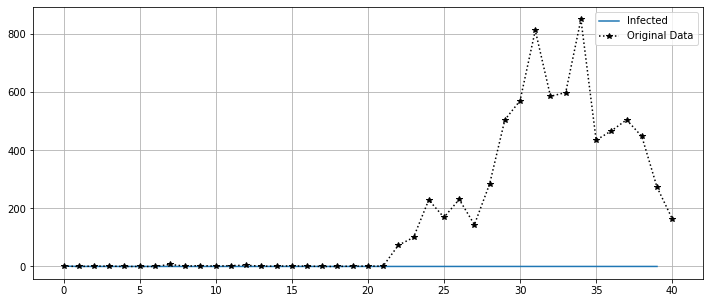

In [35]:
fig = plt.figure(figsize=(12,5))
plt.plot(solution_korea_optimal.t,solution_korea_optimal.y[1])
plt.plot(korea_df.loc[2:]['infected'].reset_index(drop=True).index,korea_df.loc[2:]['infected'],"k*:")
plt.grid("True")
plt.legend(["Infected","Original Data"])
plt.show()

In [36]:
beta_optimal = 0.06321101
gamma_optimal = 33.06340503

In [37]:
beta = beta_optimal
gamma = gamma_optimal 
solution_korea_optimal = solve_ivp(SIR, [0,40], [51_470_000, 1 ,0], t_eval=np.arange(0,40,1))

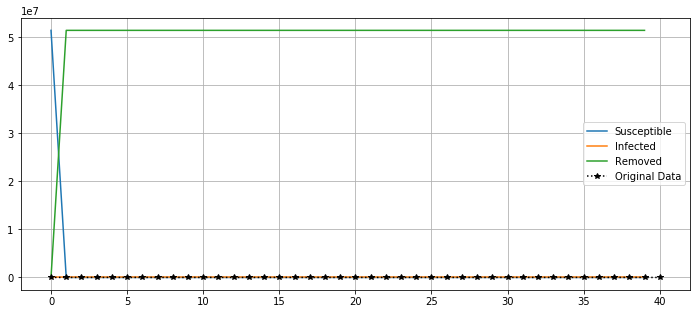

In [38]:
plot_epidemia(solution_korea_optimal, korea_df.loc[2:]['infected'])

In [39]:
china_df= epidemie_df.get_country('Mainland China')[:49]

In [1]:
epidemie_df.set_index('day').plot.line(figsize=(12,5))

NameError: name 'epidemie_df' is not defined

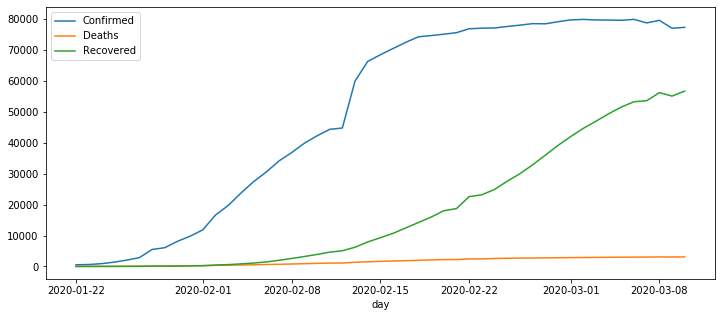

In [40]:
china_df.set_index('day').plot.line(figsize=(12,5))

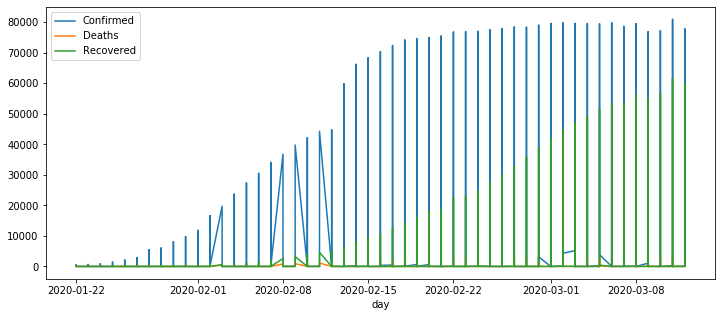

In [14]:
nb_df.set_index('day').plot.line(figsize=(12,5))

In [41]:
beta, gamma = [0.001, 0.1]
china_df['infected'] = china_df['Confirmed'].diff()
nb_steps = china_df.shape[0]
solution_china = solve_ivp(SIR, [0,40], [1_350_470_000, 1 ,0], t_eval=np.arange(0,41,1))

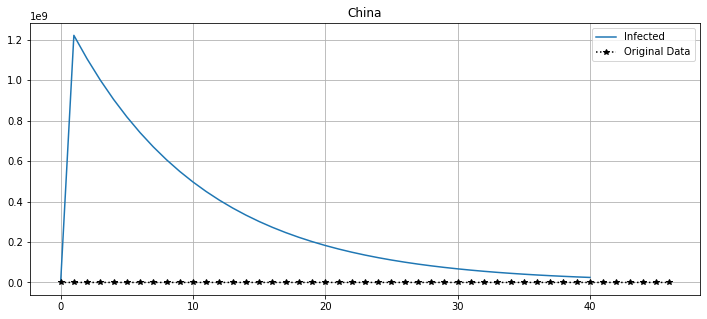

In [42]:
fig = plt.figure(figsize=(12,5))
plt.plot(solution_china.t,solution_china.y[1])
plt.plot(china_df.loc[2:]['infected'].reset_index(drop=True).index,china_df.loc[2:]['infected'],"k*:")
plt.title('China')
plt.grid("True")
plt.legend(["Infected","Original Data"])
plt.show()